In [2]:
import pandas as pd
import numpy as np
beton = pd.read_csv("/content/sample_data/Concrete.csv")
print(beton.shape)
beton.head()

(1030, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
beton.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

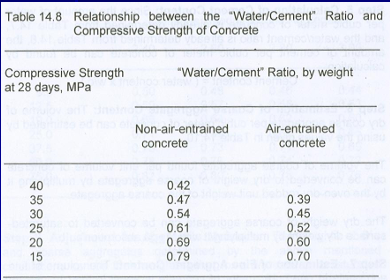

In [4]:
## Yukarıdaki tablodan da görüldüğü gibi su-çimento oranı tutarlı bir rakam olmalı.
## Veri setimizde hava sürüklenmiş beton olup olmadığından bahsedilmemiştir.
## Bu yüzden 0.25-0.85 arasında olmayan değerler tutarsız verilere olarak değerlendirilecektir.


rows_to_drop = []
for index, row in beton.iterrows():
    water_value = row['water']
    cement_value = row['cement']
    ratio = water_value / cement_value

    # water/cement oranı makul olmayan beton karışımlarını verimizden atalım.
    if not (ratio >= 0.25 and ratio <= 0.85):
      rows_to_drop.append(index)

# Filtrelenmiş satırları DataFrame'den seçelim
beton = beton.drop(rows_to_drop)

beton.reset_index(drop=True, inplace=True)
print(beton.shape)

(708, 9)


In [5]:
sutun_slag = beton["slag"]
sutun_slag
Q1 = sutun_slag.quantile (0.25)
Q3 = sutun_slag.quantile (0.75)
IQR = Q3 - Q1
print ("Q1: {}, Q3: {}, IQR = {}".format(Q1,Q3,IQR))
alt_sinir = Q1 - (IQR*1.5)
ust_sinir = Q3 + (IQR*1.5)
print (alt_sinir)
print (ust_sinir)
sutun_slag[sutun_slag< alt_sinir].count()
sutun_slag[sutun_slag> ust_sinir].count()
sutun_slag[sutun_slag > ust_sinir]  = ust_sinir
sutun_slag[sutun_slag < alt_sinir]  = alt_sinir

Q1: 0.0, Q3: 106.3, IQR = 106.3
-159.45
265.75


<ipython-input-5-664576304064>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_slag[sutun_slag > ust_sinir]  = ust_sinir
<ipython-input-5-664576304064>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_slag[sutun_slag < alt_sinir]  = alt_sinir


In [6]:
sutun_superplasticizer = beton["superplasticizer"]
sutun_superplasticizer
Q1 = sutun_superplasticizer.quantile (0.25)
Q3 = sutun_superplasticizer.quantile (0.75)
IQR = Q3 - Q1
print ("Q1: {}, Q3: {}, IQR = {}".format(Q1,Q3,IQR))
alt_sinir = Q1 - (IQR*1.5)
ust_sinir = Q3 + (IQR*1.5)
print (alt_sinir)
print (ust_sinir)
print(sutun_superplasticizer[sutun_superplasticizer< alt_sinir].count())
print(sutun_superplasticizer[sutun_superplasticizer> ust_sinir].count())
sutun_superplasticizer[sutun_superplasticizer > ust_sinir]  = ust_sinir
sutun_superplasticizer[sutun_superplasticizer < alt_sinir]  = alt_sinir

Q1: 0.0, Q3: 11.025, IQR = 11.025
-16.5375
27.5625
0
10


<ipython-input-6-f8cf1544e7fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_superplasticizer[sutun_superplasticizer > ust_sinir]  = ust_sinir
<ipython-input-6-f8cf1544e7fe>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_superplasticizer[sutun_superplasticizer < alt_sinir]  = alt_sinir


In [7]:
sutun_fineaggregate= beton["fineaggregate"]
sutun_fineaggregate
Q1 = sutun_fineaggregate.quantile (0.25)
Q3 = sutun_fineaggregate.quantile (0.75)
IQR = Q3 - Q1
print ("Q1: {}, Q3: {}, IQR = {}".format(Q1,Q3,IQR))
alt_sinir = Q1 - (IQR*1.5)
ust_sinir = Q3 + (IQR*1.5)
print (alt_sinir)
print (ust_sinir)
print(sutun_fineaggregate[sutun_fineaggregate< alt_sinir].count())
print(sutun_fineaggregate[sutun_fineaggregate> ust_sinir].count())
sutun_fineaggregate[sutun_fineaggregate > ust_sinir]  = ust_sinir
sutun_fineaggregate[sutun_fineaggregate < alt_sinir]  = alt_sinir

Q1: 734.0, Q3: 822.2, IQR = 88.20000000000005
601.6999999999999
954.5000000000001
24
5


<ipython-input-7-4f449f93a88e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_fineaggregate[sutun_fineaggregate > ust_sinir]  = ust_sinir
<ipython-input-7-4f449f93a88e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_fineaggregate[sutun_fineaggregate < alt_sinir]  = alt_sinir


In [8]:
sutun_age= beton["age"]
sutun_age
Q1 = sutun_age.quantile (0.25)
Q3 = sutun_age.quantile (0.75)
IQR = Q3 - Q1
print ("Q1: {}, Q3: {}, IQR = {}".format(Q1,Q3,IQR))
alt_sinir = Q1 - (IQR*1.5)
ust_sinir = Q3 + (IQR*1.5)
print (alt_sinir)
print (ust_sinir)
print(sutun_age[sutun_age< alt_sinir].count())
print(sutun_age[sutun_age> ust_sinir].count())
sutun_age[sutun_age > ust_sinir]  = ust_sinir
sutun_age[sutun_age < alt_sinir]  = alt_sinir

Q1: 7.0, Q3: 56.0, IQR = 49.0
-66.5
129.5
0
46


<ipython-input-8-4f0d0d232c6d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sutun_age[sutun_age > ust_sinir]  = ust_sinir


In [9]:
sutun_csMPa= beton["csMPa"]
sutun_csMPa
Q1 = sutun_csMPa.quantile (0.25)
Q3 = sutun_csMPa.quantile (0.75)
IQR = Q3 - Q1
print ("Q1: {}, Q3: {}, IQR = {}".format(Q1,Q3,IQR))
alt_sinir = Q1 - (IQR*1.5)
ust_sinir = Q3 + (IQR*1.5)
print (alt_sinir)
print (ust_sinir)
print(sutun_csMPa[sutun_csMPa< alt_sinir].count())
print(sutun_csMPa[sutun_csMPa> ust_sinir].count())
sutun_csMPa[sutun_csMPa > ust_sinir]  = ust_sinir
sutun_csMPa[sutun_csMPa< alt_sinir]  = alt_sinir

Q1: 26.7625, Q3: 51.5625, IQR = 24.8
-10.437500000000004
88.7625
0
0


<Axes: >

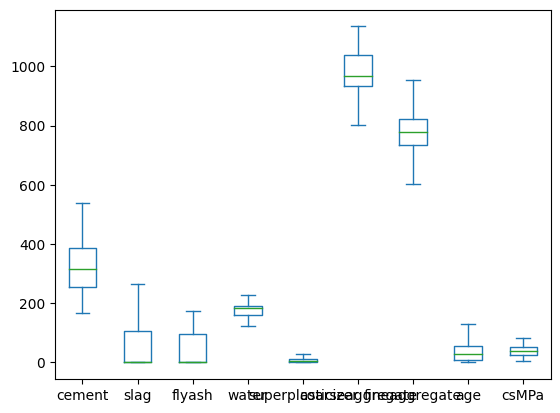

In [10]:
beton.plot.box()

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
y = beton['csMPa']
X = beton.drop(['csMPa','flyash'], axis=1)

In [ ]:
y

0       79.7725
1       61.8900
2       40.2700
3       41.0500
4       44.3000
         ...   
1025    44.2800
1026    31.1800
1027    23.7000
1028    32.7700
1029    32.4000
Name: csMPa, Length: 1030, dtype: float64

In [12]:
X

,cement,slag,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,228.0,0.0,932.0,601.7,129.5
3,332.5,142.5,228.0,0.0,932.0,601.7,129.5
4,380.0,95.0,228.0,0.0,932.0,601.7,129.5
...,...,...,...,...,...,...,...
703,298.2,0.0,209.7,11.1,879.6,744.2,28.0
704,264.5,111.0,195.5,5.9,832.6,790.4,28.0
705,276.4,116.0,179.6,8.9,870.1,768.3,28.0
706,322.2,0.0,196.0,10.4,817.9,813.4,28.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Skoru: ", r2)

R2 Skoru:  0.6999089154312367


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search = GridSearchCV(model, param_grid, scoring=make_scorer(r2_score), cv=10)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=10)
r2_cv = r2_score(y, y_pred_cv)
print("En İyi Parametreler:", best_params)
print("R2 Skoru (GridSearch ve Çapraz Doğrulama):", r2_cv)

En İyi Parametreler: {'fit_intercept': True, 'positive': False}
R2 Skoru (GridSearch ve Çapraz Doğrulama): 0.6275520007295952


In [15]:
beton_filtered = beton.drop(['coarseaggregate', 'fineaggregate'], axis=1)
X_filtered = beton_filtered.drop('csMPa', axis=1)
y_filtered = beton_filtered['csMPa']
model_filtered = LinearRegression()
param_grid_filtered = {'fit_intercept': [True], 'positive': [True, False]}
grid_search_filtered = GridSearchCV(model_filtered, param_grid_filtered, scoring=make_scorer(r2_score), cv=10)
grid_search_filtered.fit(X_filtered, y_filtered)
best_params_filtered = grid_search_filtered.best_params_
best_model_filtered = grid_search_filtered.best_estimator_
y_pred_cv_filtered = cross_val_predict(best_model_filtered, X_filtered, y_filtered, cv=10)
r2_cv_filtered = r2_score(y_filtered, y_pred_cv_filtered)
print("En İyi Parametreler:", best_params_filtered)
print("R2 Skoru (GridSearch ve Çapraz Doğrulama):", r2_cv_filtered)

En İyi Parametreler: {'fit_intercept': True, 'positive': False}
R2 Skoru (GridSearch ve Çapraz Doğrulama): 0.654905082057816


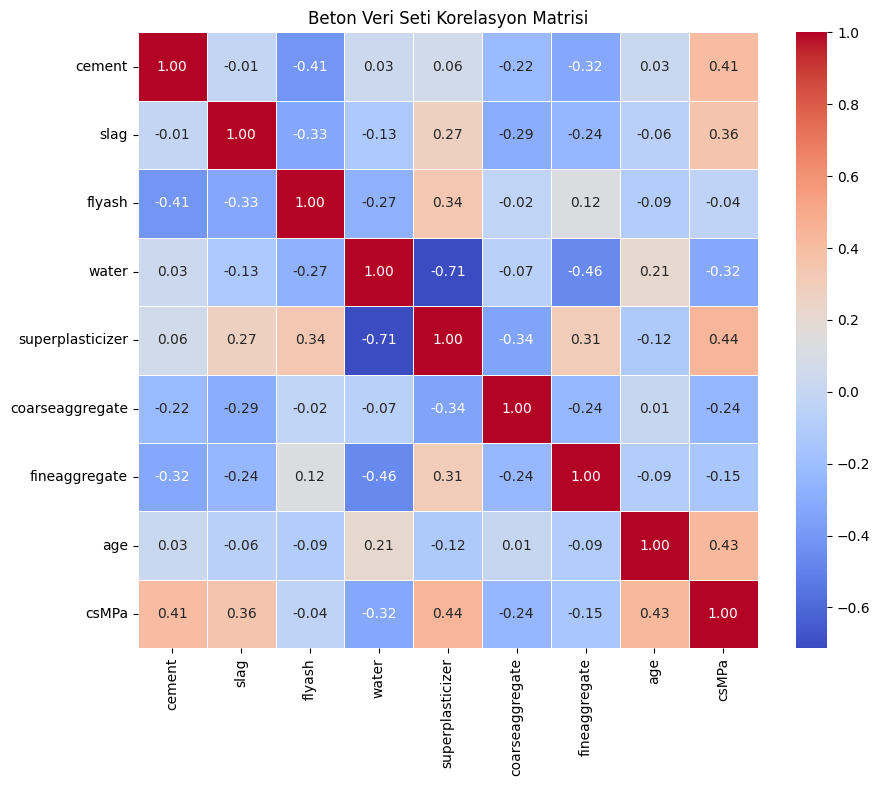

In [16]:
import seaborn as sns
correlation_matrix = beton.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Beton Veri Seti Korelasyon Matrisi')
plt.show()

In [17]:
correlation_matrix = beton.corr()
print(correlation_matrix)


                    cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.006682 -0.405832  0.032836          0.064344   
slag             -0.006682  1.000000 -0.331214 -0.129303          0.274627   
flyash           -0.405832 -0.331214  1.000000 -0.267142          0.343529   
water             0.032836 -0.129303 -0.267142  1.000000         -0.713552   
superplasticizer  0.064344  0.274627  0.343529 -0.713552          1.000000   
coarseaggregate  -0.221615 -0.293860 -0.024846 -0.070116         -0.344292   
fineaggregate    -0.324605 -0.243481  0.123774 -0.461962          0.307469   
age               0.025304 -0.064042 -0.093455  0.208891         -0.122671   
csMPa             0.407274  0.363488 -0.035811 -0.321997          0.439968   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.221615      -0.324605  0.025304  0.407274  
slag                    -0.293860      -0.243481 -0.064042  0.363488  
flyash

In [18]:
import pandas as pd

# Beton verisetini yükleyin veya uygun şekilde ayarlayın
# Örnek olarak, aşağıdaki kodu kullanabilirsiniz:
# beton = pd.read_csv('beton_veri_seti.csv')

# Sütunların varyansını hesapla
varyanslar = beton.var()

# Varyansları yazdır
print(varyanslar)


cement              7301.514993
slag                5485.928035
flyash              3212.484292
water                494.648654
superplasticizer      39.286002
coarseaggregate     6421.828153
fineaggregate       6420.946960
age                 1371.059632
csMPa                283.707772
dtype: float64


In [19]:
import pandas as pd

# Beton verisetini yükleyin veya uygun şekilde ayarlayın
# Örnek olarak, aşağıdaki kodu kullanabilirsiniz:
# beton = pd.read_csv('beton_veri_seti.csv')

# csMPa'ya göre sütunların varyansını hesapla
varyanslar = beton.drop('csMPa', axis=1).var()

# Varyansları yazdır
print(varyanslar)


cement              7301.514993
slag                5485.928035
flyash              3212.484292
water                494.648654
superplasticizer      39.286002
coarseaggregate     6421.828153
fineaggregate       6420.946960
age                 1371.059632
dtype: float64


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Modelin tahminlerini yap
csMPa_tahmin = model.predict(X_test)

# Hataları hesapla
hatalar = y_test - csMPa_tahmin

# Hataların varyansını hesapla
varyans = np.var(hatalar)

print("Hataların Varyansı:", varyans)


Hataların Varyansı: 82.48609291810175


In [21]:
beton_filtered = beton.drop(['superplasticizer', 'water'], axis=1)
X_filtered = beton_filtered.drop('csMPa', axis=1)
y_filtered = beton_filtered['csMPa']
model_filtered = LinearRegression()
param_grid_filtered = {'fit_intercept': [True], 'positive': [True, False]}
grid_search_filtered = GridSearchCV(model_filtered, param_grid_filtered, scoring=make_scorer(r2_score), cv=10)
grid_search_filtered.fit(X_filtered, y_filtered)
best_params_filtered = grid_search_filtered.best_params_
best_model_filtered = grid_search_filtered.best_estimator_
y_pred_cv_filtered = cross_val_predict(best_model_filtered, X_filtered, y_filtered, cv=10)
r2_cv_filtered = r2_score(y_filtered, y_pred_cv_filtered)
print("En İyi Parametreler:", best_params_filtered)
print("R2 Skoru (GridSearch ve Çapraz Doğrulama):", r2_cv_filtered)

En İyi Parametreler: {'fit_intercept': True, 'positive': False}
R2 Skoru (GridSearch ve Çapraz Doğrulama): 0.6222082127507325
